## Expectation-Maximization Example in Two Dimensions

D.E. Brown, DS 60014 Bayesian Machine Learning

In [1]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

Automatically created module for IPython interactive environment


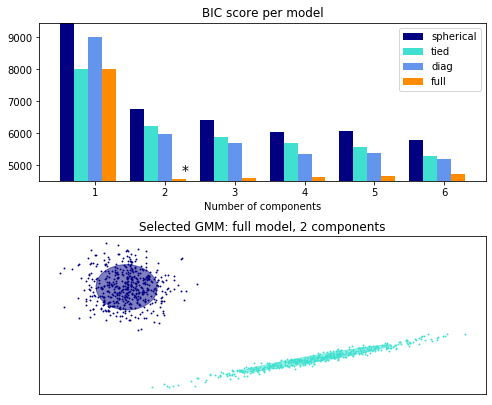

In [9]:
# This code is from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html



print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [23]:
# Unsupervised Image Classification
# using Gaussian Mixture Model Expectation Maximization
# by William F. Basener
# University of Virginia, School of Data Science

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3)
# put that into the EM algorithm in a way that EM can understand
# in the segmentation 
# Each row will be a pixel that have 3 values with RGB values
X = np.reshape(imArray,[nrows*ncols,nbands])

# Call and train the Gaussian Mixture
# tolarence: tolds when to stop the process
# how close the log likelihood to be when to stop
model = GaussianMixture(n_components=4, tol=0.0001)
model.fit(X)
# Find the hard classes based on the maximum probability of N classes
yhat = model.predict(X)

pred_probs = model.predict_proba(X)

In [28]:
tmp = {1:[],
      2:[],
      3:[],
      0:[]}



for i in range(0, pred)
    tmp[i.tolist().index(max(i))] = 




0.9898650825364999

In [5]:
# reshape the result into an image
imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.show()

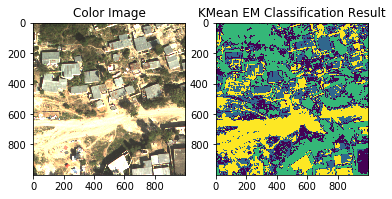

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

yhat = kmeans.predict(X)

imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('KMean EM Classification Result')
plt.show()

In [1]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from scipy import linalg
import matplotlib as mpl
import itertools


In [2]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*st.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*st.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

In [3]:
# Example of a mixture of 3 Gaussians

s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [4]:
# EM algorithm 

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)
    color_iter = itertools.cycle(['navy', 'darkorange', 'turquoise', 'cornflowerblue'])

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()
            
        
        # show the means of the clusters
        new_mus = pd.DataFrame(mus)
        print("")
        print("μ values")
        print(new_mus)
        
        # Plot the data with ellipses
        
        subplot = plt.subplots(figsize=(9, 7))
        ax = plt.subplot(111)

    
        for i, (mean, cov, color) in enumerate(zip(mus, sigmas,
                                           color_iter)):
            v, w = linalg.eigh(cov)
            plt.scatter(xs[:,0], xs[:,1], .8)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan2(w[0][1], w[0][0])
            angle = 180. * angle / np.pi  # convert to degrees
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            #ell.set_clip_box(plt.bbox)
            ell.set_alpha(.5)
            ax.add_artist(ell)

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)
        print(f'log_likelihood: {ll_new:3.4f}')
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [11]:
# 2 clusters in the data
# Guess starting points

np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)



μ values
          0         1
0 -0.300722  3.291354
1 -1.662922  0.821662
log_likelihood: -3965.6300

μ values
          0         1
0 -0.222957  3.484960
1 -1.742361  0.593815
log_likelihood: -3891.4220

μ values
          0         1
0 -0.128630  3.701489
1 -1.819987  0.391053
log_likelihood: -3807.5650

μ values
          0         1
0 -0.052391  3.871387
1 -1.884863  0.234664
log_likelihood: -3728.5094

μ values
          0         1
0 -0.016487  3.957555
1 -1.924837  0.134329
log_likelihood: -3695.7789

μ values
          0         1
0 -0.011904  3.983817
1 -1.937302  0.085173
log_likelihood: -3691.2653

μ values
          0         1
0 -0.015838  3.987535
1 -1.941307  0.060379
log_likelihood: -3690.7851

μ values
          0         1
0 -0.020105  3.986286
1 -1.943345  0.045505
log_likelihood: -3690.6560

μ values
          0         1
0 -0.023273  3.984627
1 -1.944642  0.035862
log_likelihood: -3690.5996

μ values
          0         1
0 -0.025445  3.983329
1 -1.945523  0.0294

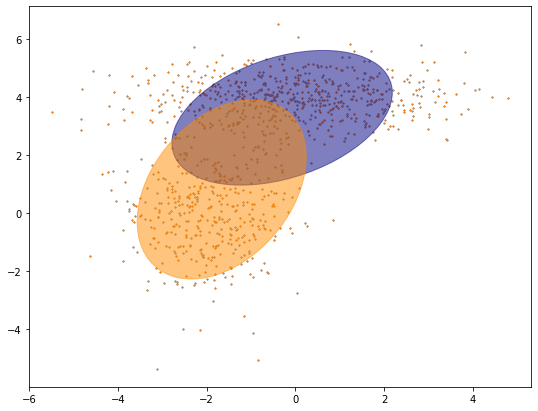

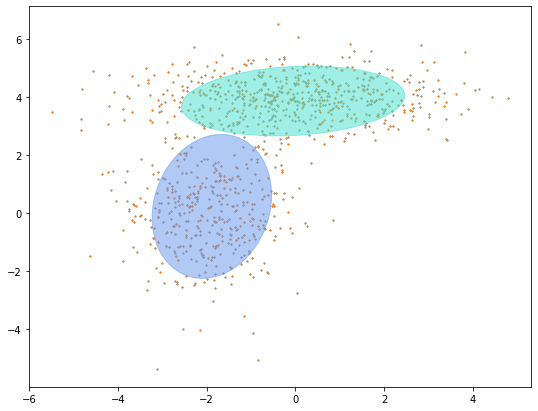

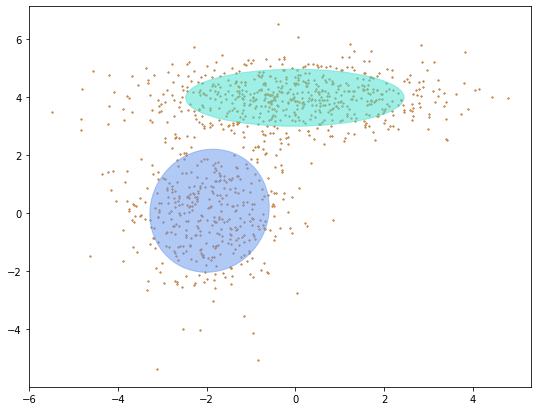

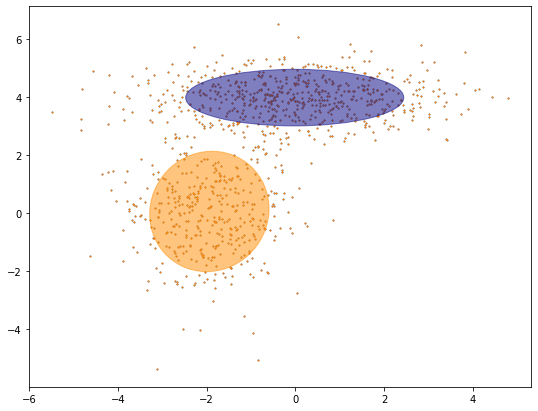

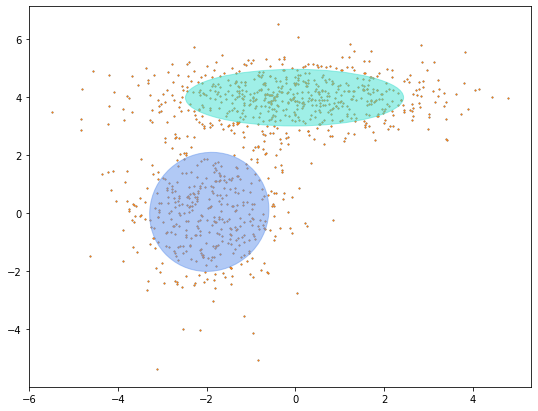

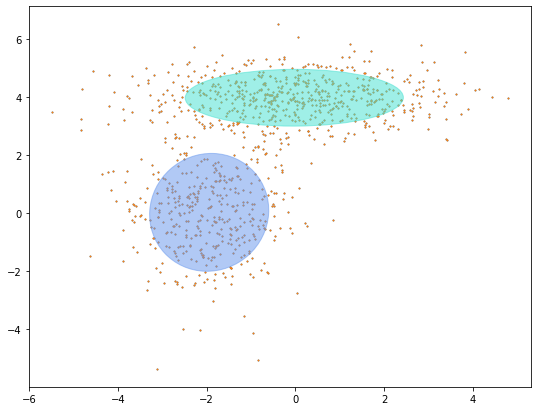

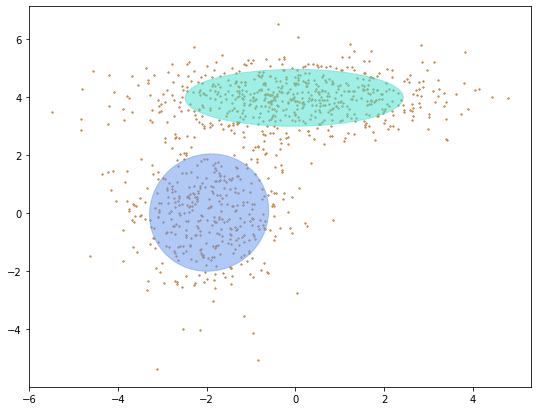

In [12]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

In [13]:
# 2 clusters in the data
# Guess starting points

np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[-2,0], [0,4]])
_sigmas = np.array([[[3, 0.2], [0.5, 0.5]], [[1,0.2],[0.5,2]]])
_pis = np.array([0.2, 0.8])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':



μ values
          0         1
0 -0.049964  3.789033
1 -1.267768  1.542587
log_likelihood: -3636.0310

μ values
          0         1
0 -0.007708  3.874209
1 -1.386460  1.305118
log_likelihood: -3607.7756

μ values
          0         1
0  0.018617  3.958247
1 -1.459233  1.079415
log_likelihood: -3592.5357

μ values
          0         1
0  0.036439  4.038248
1 -1.503373  0.876987
log_likelihood: -3576.7213

μ values
          0         1
0  0.047815  4.104486
1 -1.537481  0.696224
log_likelihood: -3560.1223

μ values
          0         1
0  0.052973  4.145486
1 -1.572133  0.543065
log_likelihood: -3546.0386

μ values
          0         1
0  0.052515  4.157635
1 -1.611792  0.419326
log_likelihood: -3536.2829

μ values
          0         1
0  0.048537  4.148067
1 -1.657451  0.318569
log_likelihood: -3529.5598

μ values
          0         1
0  0.043107  4.127463
1 -1.706341  0.234034
log_likelihood: -3524.2884

μ values
          0         1
0  0.037409  4.103533
1 -1.754458  0.1623

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3510.1835
Wall time: 22.6 s


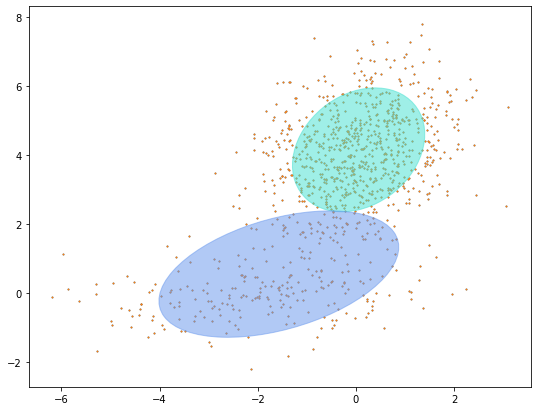

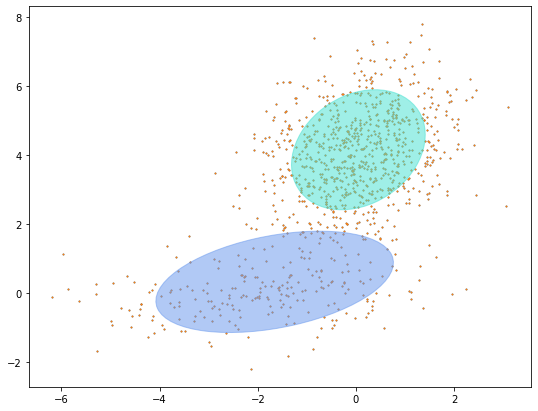

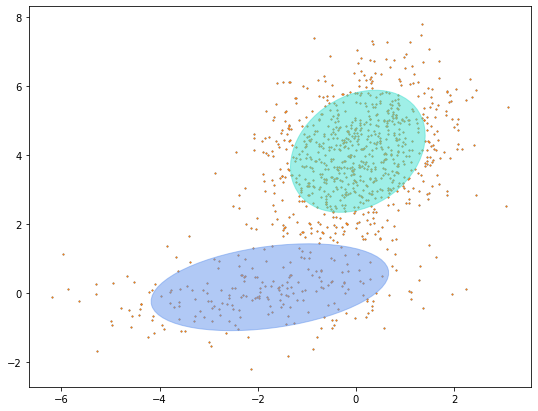

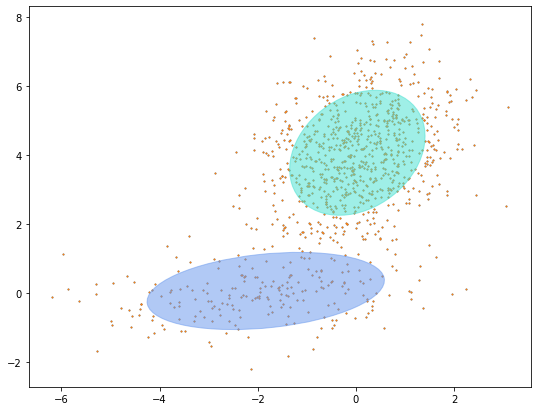

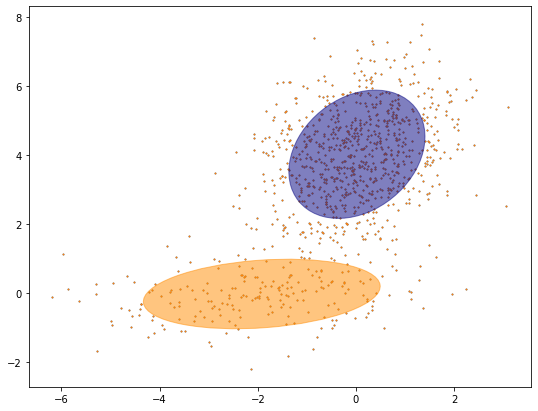

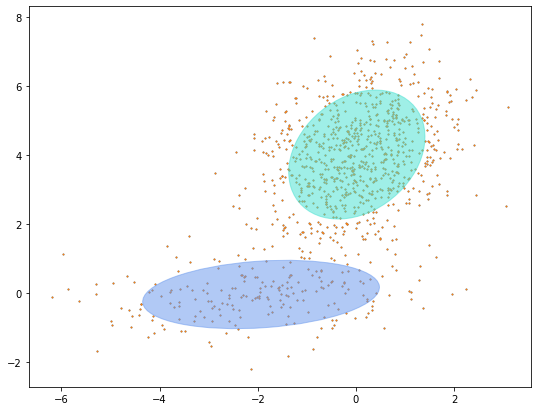

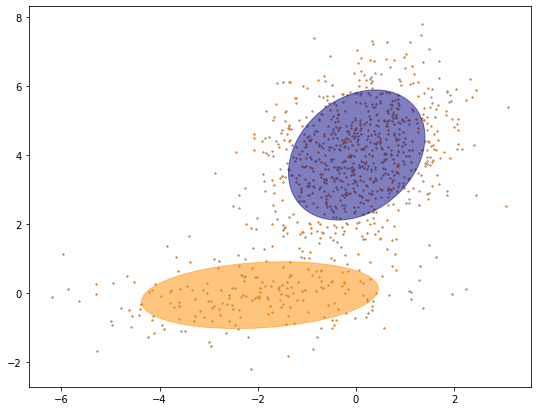

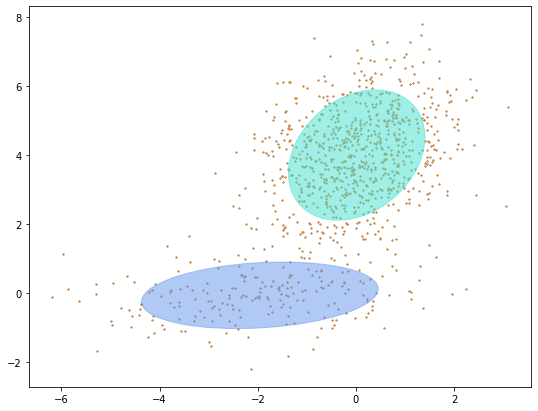

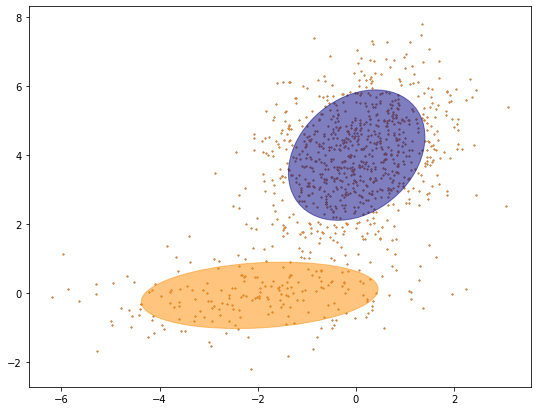

In [14]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

In [7]:
# 2 cluster in the data (same data), but guess 3
# initial guesses for parameters
# random seed

np.random.seed(123)

pis = np.random.random(3)
pis /= pis.sum()
mus = np.random.random((3,2))
sigmas = np.array([np.eye(2)] * 3)



μ values
          0         1
0 -0.814661  2.128451
1 -0.760243  3.029201
2 -0.959577  1.113848
log_likelihood: -4038.5458

μ values
          0         1
0 -0.834531  2.061537
1 -0.702497  3.183097
2 -1.073316  0.866912
log_likelihood: -4016.3274

μ values
          0         1
0 -0.901003  1.935019
1 -0.575839  3.414073
2 -1.232203  0.569999
log_likelihood: -3974.4096

μ values
          0         1
0 -1.030372  1.753532
1 -0.388094  3.666842
2 -1.404745  0.275499
log_likelihood: -3901.1156

μ values
          0         1
0 -1.221006  1.528640
1 -0.190213  3.870599
2 -1.554319  0.012085
log_likelihood: -3806.5323

μ values
          0         1
0 -1.428476  1.309135
1 -0.052748  3.977189
2 -1.657478 -0.208802
log_likelihood: -3743.5090

μ values
          0         1
0 -1.583055  1.161584
1  0.011158  4.016067
2 -1.716872 -0.361492
log_likelihood: -3719.3813

μ values
          0         1
0 -1.682842  1.073463
1  0.037434  4.028042
2 -1.755110 -0.448657
log_likelihood: -3708.3650


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3688.7421

μ values
          0         1
0 -1.775829  0.524740
1  0.011112  3.996344
2 -2.084169 -0.257755


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3688.3020

μ values
          0         1
0 -1.760674  0.503874
1  0.009391  3.995382
2 -2.103217 -0.233598


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3687.9172

μ values
          0         1
0 -1.745420  0.485073
1  0.007630  3.994571
2 -2.121051 -0.211836


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3687.5820

μ values
          0         1
0 -1.730326  0.468050
1  0.005838  3.993890
2 -2.137634 -0.192378


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3687.2908

μ values
          0         1
0 -1.715612  0.452575
1  0.004039  3.993319
2 -2.152955 -0.175061


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3687.0391

μ values
          0         1
0 -1.701447  0.438468
1  0.002264  3.992836
2 -2.167032 -0.159693


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.8230

μ values
          0         1
0 -1.687945  0.425587
1  0.000541  3.992425
2 -2.179899 -0.146073


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.6386

μ values
          0         1
0 -1.675170  0.413815
1 -0.001111  3.992070
2 -2.191608 -0.134003


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.4816

μ values
          0         1
0 -1.663134  0.403049
1 -0.002676  3.991762
2 -2.202229 -0.123295


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.3479

μ values
          0         1
0 -1.651819  0.393197
1 -0.004148  3.991490
2 -2.211842 -0.113775


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.2333

μ values
          0         1
0 -1.641179  0.384174
1 -0.005524  3.991248
2 -2.220533 -0.105286


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.1343

μ values
          0         1
0 -1.631156  0.375903
1 -0.006807  3.991031
2 -2.228388 -0.097688


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3686.0477

μ values
          0         1
0 -1.621685  0.368317
1 -0.008001  3.990835
2 -2.235493 -0.090857


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.9711

μ values
          0         1
0 -1.612702  0.361351
1 -0.009111  3.990656
2 -2.241925 -0.084687


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.9024

μ values
          0         1
0 -1.604147  0.354950
1 -0.010143  3.990493
2 -2.247757 -0.079088


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.8401

μ values
          0         1
0 -1.595965  0.349063
1 -0.011105  3.990343
2 -2.253053 -0.073980


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.7829

μ values
          0         1
0 -1.588107  0.343645
1 -0.012001  3.990205
2 -2.257870 -0.069297


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.7301

μ values
          0         1
0 -1.580531  0.338655
1 -0.012838  3.990077
2 -2.262258 -0.064982


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.6807

μ values
          0         1
0 -1.573201  0.334058
1 -0.013621  3.989958
2 -2.266260 -0.060987


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.6343

μ values
          0         1
0 -1.566084  0.329819
1 -0.014355  3.989847
2 -2.269915 -0.057271


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.5905

μ values
          0         1
0 -1.559154  0.325911
1 -0.015044  3.989744
2 -2.273253 -0.053800


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.5488

μ values
          0         1
0 -1.552389  0.322306
1 -0.015692  3.989647
2 -2.276305 -0.050544


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.5089

μ values
          0         1
0 -1.545768  0.318983
1 -0.016303  3.989557
2 -2.279094 -0.047479


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.4707

μ values
          0         1
0 -1.539275  0.315919
1 -0.016880  3.989472
2 -2.281643 -0.044583


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.4339

μ values
          0         1
0 -1.532897  0.313097
1 -0.017426  3.989391
2 -2.283969 -0.041841


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.3983

μ values
          0         1
0 -1.526619  0.310500
1 -0.017943  3.989316
2 -2.286090 -0.039236


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.3639

μ values
          0         1
0 -1.520432  0.308113
1 -0.018434  3.989244
2 -2.288020 -0.036756


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.3304

μ values
          0         1
0 -1.514325  0.305925
1 -0.018900  3.989177
2 -2.289773 -0.034391


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.2977

μ values
          0         1
0 -1.508292  0.303923
1 -0.019344  3.989113
2 -2.291359 -0.032131


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.2659

μ values
          0         1
0 -1.502324  0.302098
1 -0.019767  3.989052
2 -2.292790 -0.029969


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.2347

μ values
          0         1
0 -1.496416  0.300440
1 -0.020171  3.988995
2 -2.294074 -0.027899


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.2041

μ values
          0         1
0 -1.490561  0.298944
1 -0.020557  3.988940
2 -2.295220 -0.025914


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.1741

μ values
          0         1
0 -1.484755  0.297600
1 -0.020926  3.988888
2 -2.296236 -0.024011


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.1446

μ values
          0         1
0 -1.478993  0.296404
1 -0.021279  3.988839
2 -2.297128 -0.022184


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.1155

μ values
          0         1
0 -1.473272  0.295351
1 -0.021618  3.988792
2 -2.297903 -0.020430


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.0868

μ values
          0         1
0 -1.467588  0.294436
1 -0.021943  3.988747
2 -2.298567 -0.018746


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.0585

μ values
          0         1
0 -1.461937  0.293655
1 -0.022254  3.988704
2 -2.299124 -0.017129


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.0305

μ values
          0         1
0 -1.456318  0.293006
1 -0.022554  3.988663
2 -2.299579 -0.015577


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3685.0028

μ values
          0         1
0 -1.450728  0.292484
1 -0.022841  3.988623
2 -2.299938 -0.014088


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.9755

μ values
          0         1
0 -1.445165  0.292088
1 -0.023118  3.988586
2 -2.300203 -0.012659


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.9483

μ values
          0         1
0 -1.439628  0.291817
1 -0.023384  3.988549
2 -2.300379 -0.011290


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.9214

μ values
          0         1
0 -1.434114  0.291667
1 -0.023640  3.988515
2 -2.300468 -0.009977


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.8948

μ values
          0         1
0 -1.428623  0.291638
1 -0.023886  3.988481
2 -2.300475 -0.008721


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.8683

μ values
          0         1
0 -1.423154  0.291729
1 -0.024123  3.988449
2 -2.300401 -0.007519


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.8421

μ values
          0         1
0 -1.417706  0.291938
1 -0.024351  3.988418
2 -2.300251 -0.006371


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.8160

μ values
          0         1
0 -1.412278  0.292265
1 -0.024571  3.988387
2 -2.300025 -0.005275


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.7901

μ values
          0         1
0 -1.406870  0.292709
1 -0.024783  3.988358
2 -2.299727 -0.004231


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.7644

μ values
          0         1
0 -1.401483  0.293269
1 -0.024987  3.988330
2 -2.299359 -0.003236


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.7389

μ values
          0         1
0 -1.396115  0.293946
1 -0.025183  3.988302
2 -2.298922 -0.002291


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.7135

μ values
          0         1
0 -1.390767  0.294739
1 -0.025373  3.988274
2 -2.298420 -0.001395


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.6883

μ values
          0         1
0 -1.385440  0.295646
1 -0.025555  3.988248
2 -2.297853 -0.000545


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.6632

μ values
          0         1
0 -1.380134  0.296669
1 -0.025731  3.988221
2 -2.297223  0.000257


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.6383

μ values
          0         1
0 -1.374849  0.297806
1 -0.025900  3.988195
2 -2.296532  0.001014


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.6136

μ values
          0         1
0 -1.369586  0.299056
1 -0.026063  3.988170
2 -2.295782  0.001727


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.5890

μ values
          0         1
0 -1.364346  0.300420
1 -0.026220  3.988144
2 -2.294975  0.002395


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.5645

μ values
          0         1
0 -1.359131  0.301897
1 -0.026371  3.988119
2 -2.294111  0.003021


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.5403

μ values
          0         1
0 -1.353940  0.303485
1 -0.026517  3.988093
2 -2.293192  0.003605


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.5162

μ values
          0         1
0 -1.348775  0.305184
1 -0.026657  3.988067
2 -2.292220  0.004148


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.4923

μ values
          0         1
0 -1.343638  0.306993
1 -0.026792  3.988041
2 -2.291197  0.004651


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.4685

μ values
          0         1
0 -1.338530  0.308910
1 -0.026923  3.988015
2 -2.290123  0.005115


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.4449

μ values
          0         1
0 -1.333451  0.310934
1 -0.027048  3.987988
2 -2.289000  0.005541


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.4215

μ values
          0         1
0 -1.328405  0.313063
1 -0.027169  3.987961
2 -2.287830  0.005931


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.3983

μ values
          0         1
0 -1.323391  0.315295
1 -0.027286  3.987934
2 -2.286613  0.006285


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.3753

μ values
          0         1
0 -1.318411  0.317628
1 -0.027399  3.987905
2 -2.285352  0.006604


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.3525

μ values
          0         1
0 -1.313468  0.320060
1 -0.027508  3.987877
2 -2.284048  0.006891


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.3299

μ values
          0         1
0 -1.308563  0.322587
1 -0.027613  3.987847
2 -2.282703  0.007146


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.3075

μ values
          0         1
0 -1.303697  0.325208
1 -0.027715  3.987816
2 -2.281317  0.007370


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.2853

μ values
          0         1
0 -1.298872  0.327919
1 -0.027813  3.987785
2 -2.279893  0.007564


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.2633

μ values
          0         1
0 -1.294089  0.330716
1 -0.027908  3.987752
2 -2.278432  0.007731


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.2416

μ values
          0         1
0 -1.289351  0.333595
1 -0.028001  3.987719
2 -2.276935  0.007870


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.2201

μ values
          0         1
0 -1.284660  0.336554
1 -0.028091  3.987684
2 -2.275405  0.007985


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.1988

μ values
          0         1
0 -1.280015  0.339588
1 -0.028178  3.987649
2 -2.273842  0.008075


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.1778

μ values
          0         1
0 -1.275420  0.342692
1 -0.028263  3.987612
2 -2.272250  0.008143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.1571

μ values
          0         1
0 -1.270877  0.345862
1 -0.028346  3.987573
2 -2.270628  0.008189


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.1366

μ values
          0         1
0 -1.266385  0.349093
1 -0.028426  3.987534
2 -2.268980  0.008216


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.1164

μ values
          0         1
0 -1.261948  0.352382
1 -0.028506  3.987493
2 -2.267306  0.008224


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.0965

μ values
          0         1
0 -1.257566  0.355721
1 -0.028583  3.987451
2 -2.265609  0.008215


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.0768

μ values
          0         1
0 -1.253241  0.359107
1 -0.028659  3.987408
2 -2.263891  0.008190


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.0575

μ values
          0         1
0 -1.248974  0.362535
1 -0.028734  3.987363
2 -2.262152  0.008150


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


log_likelihood: -3684.0384
Wall time: 1min 57s


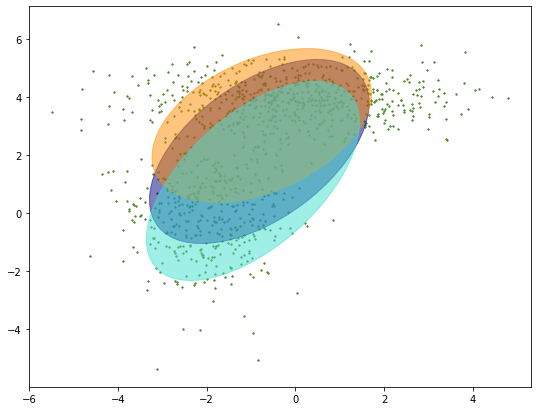

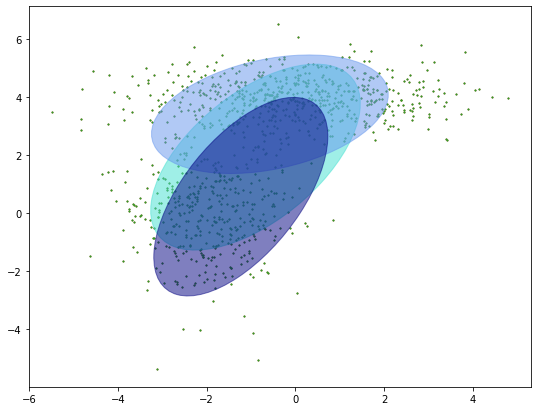

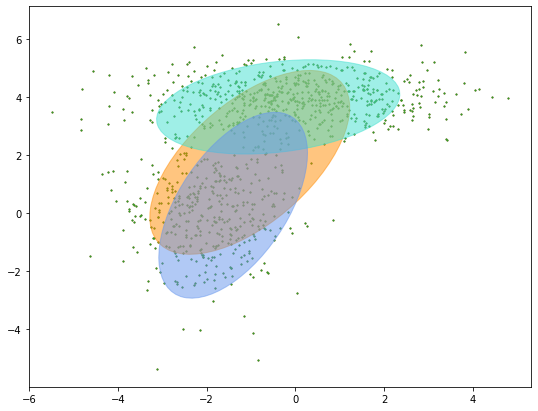

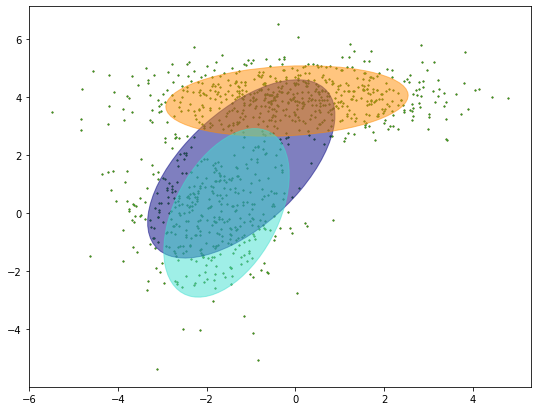

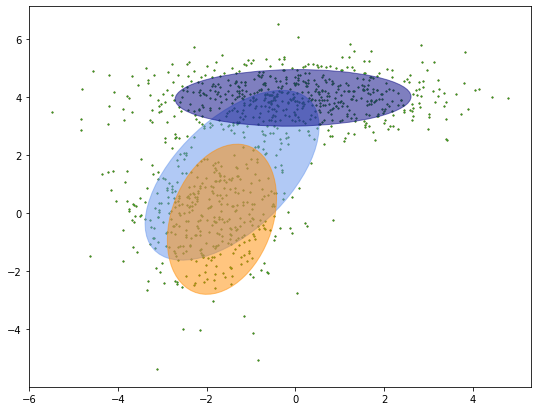

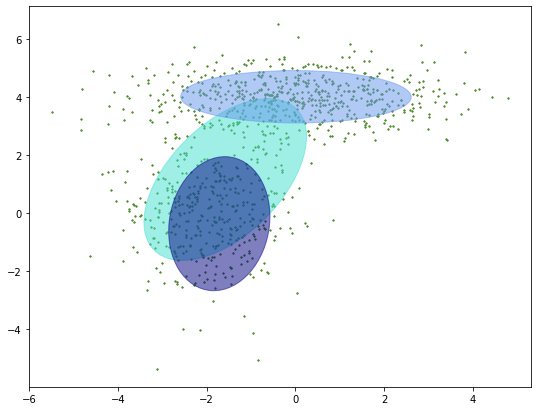

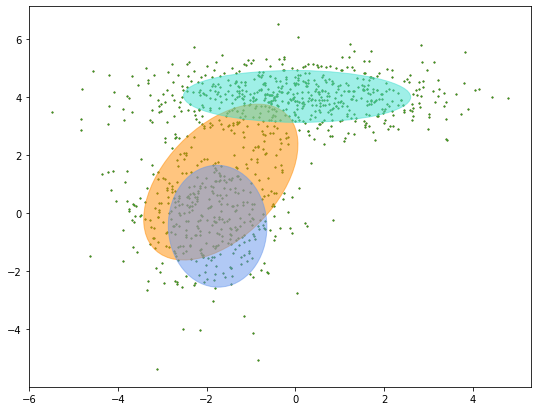

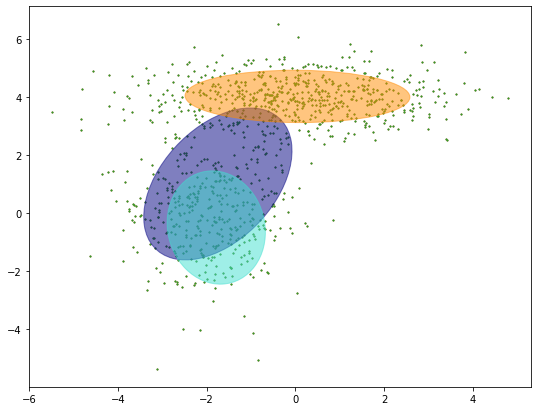

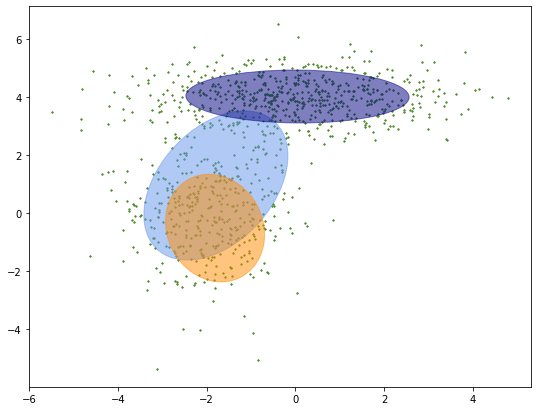

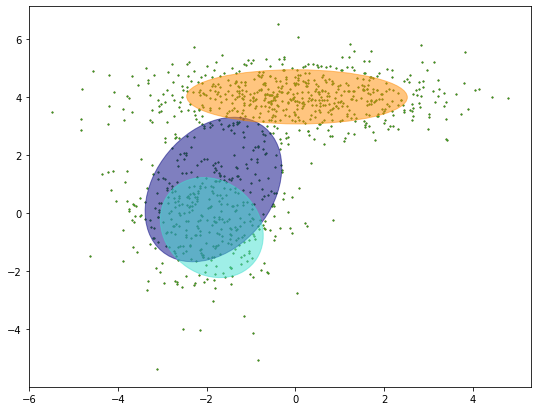

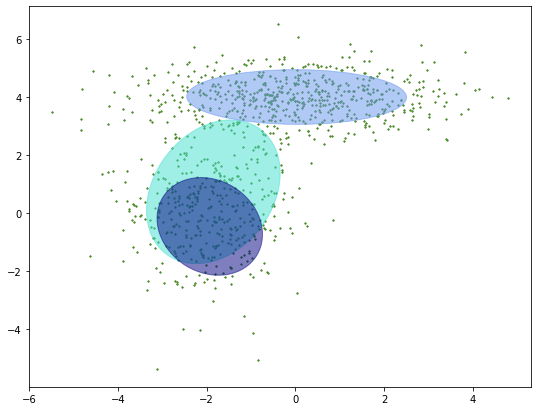

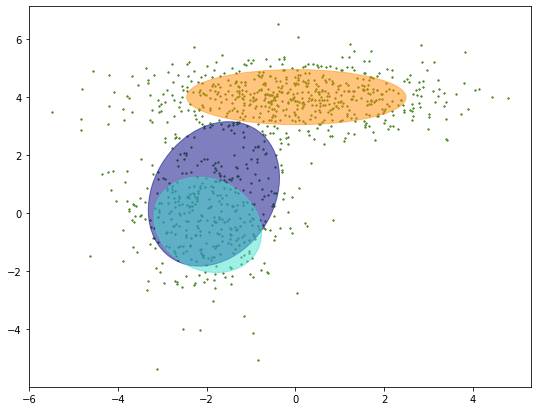

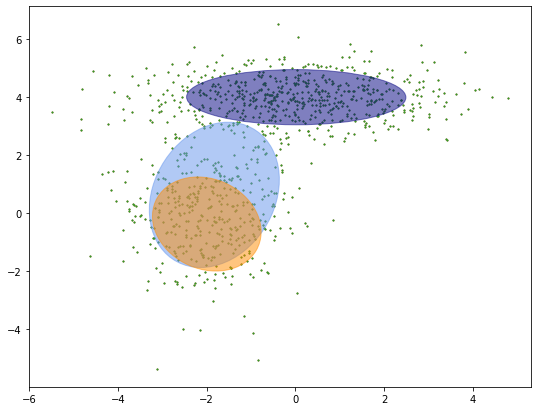

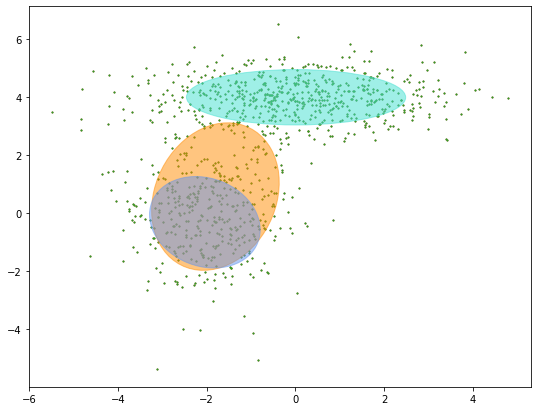

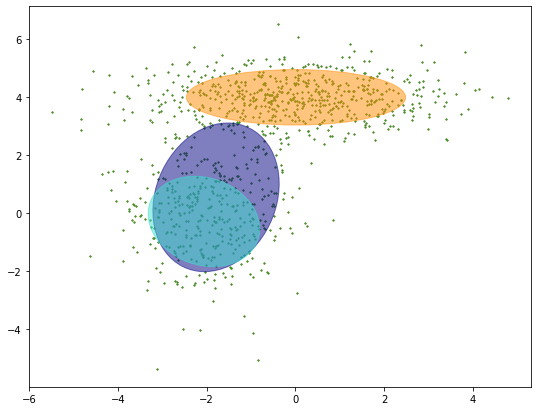

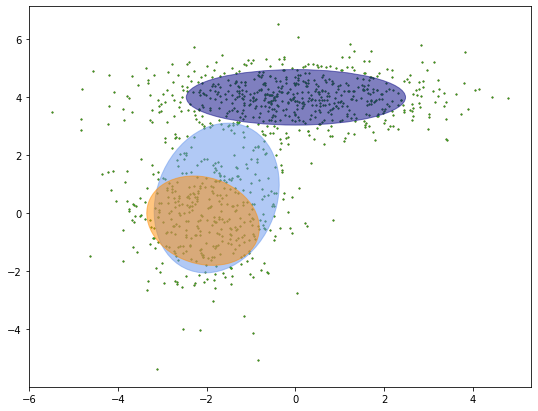

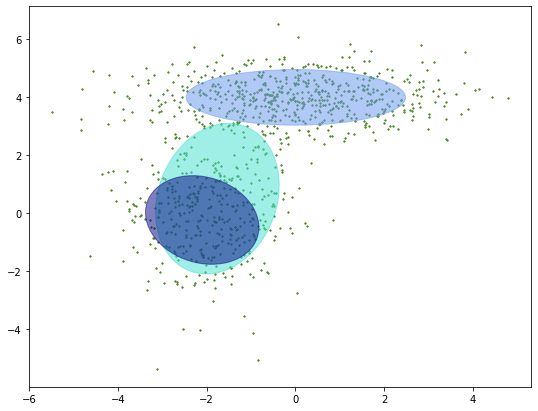

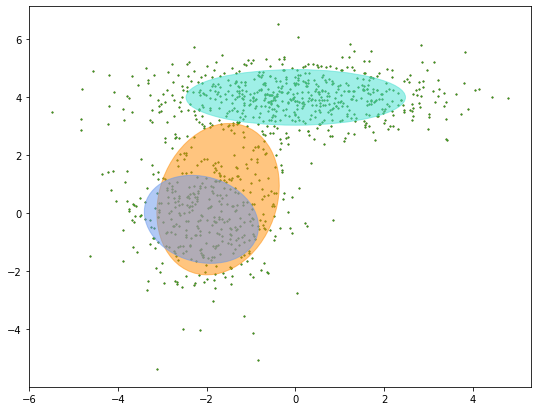

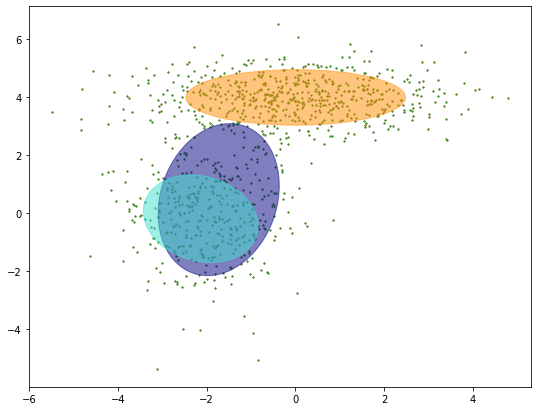

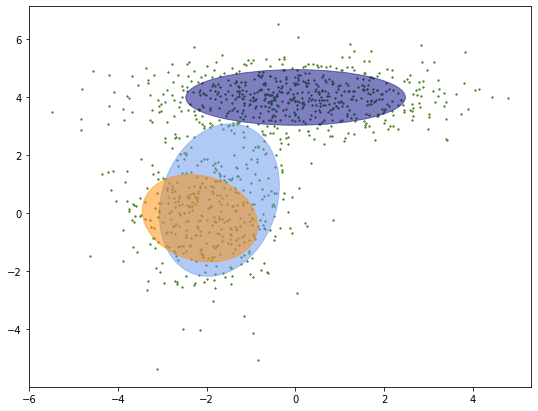

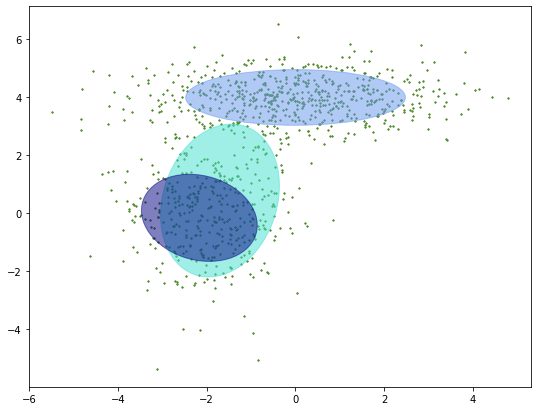

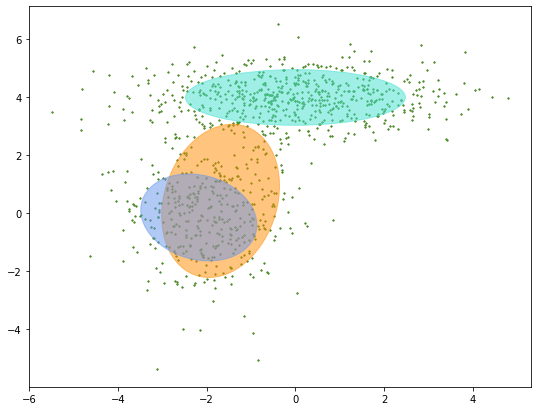

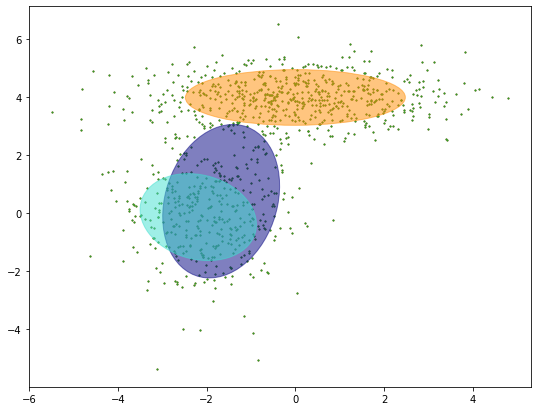

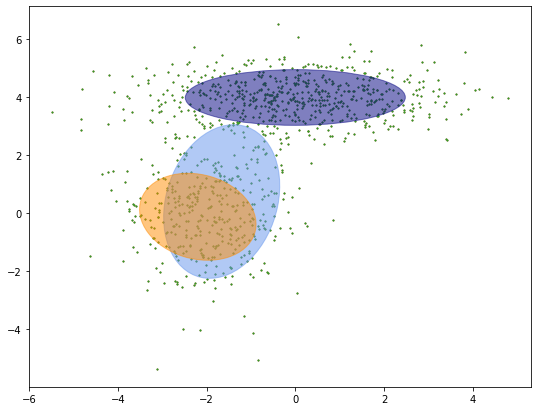

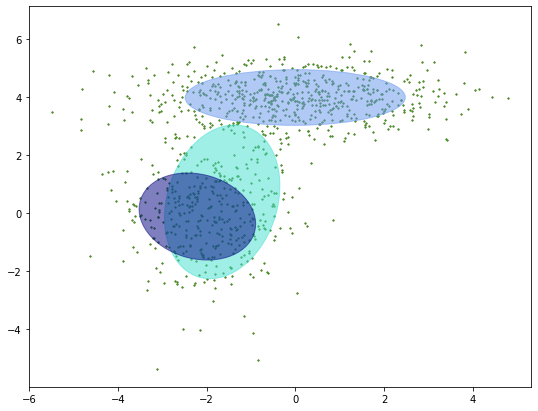

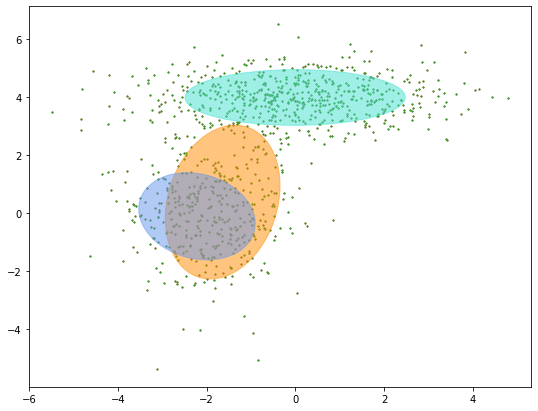

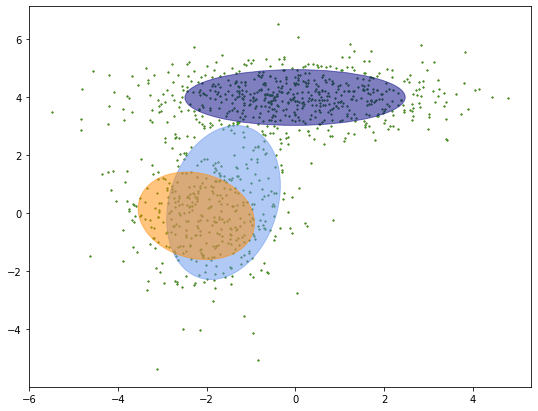

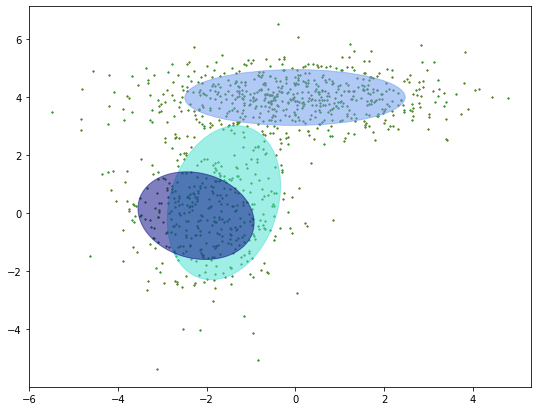

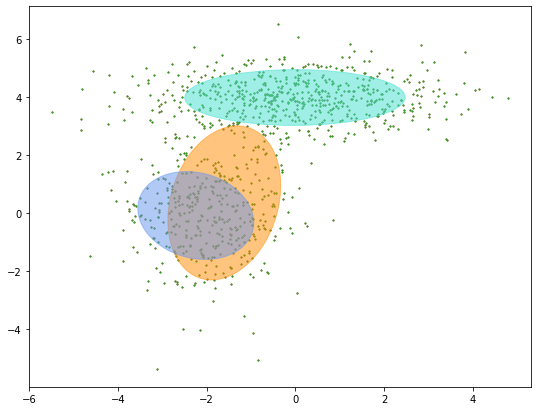

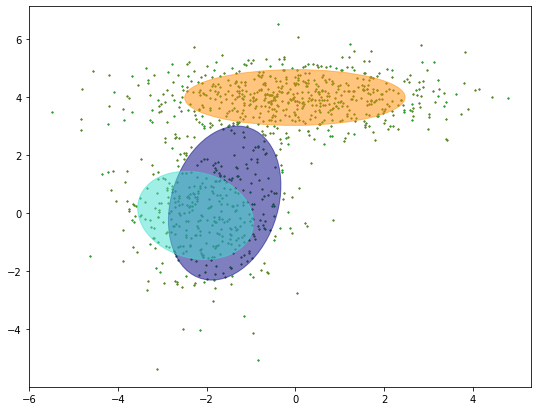

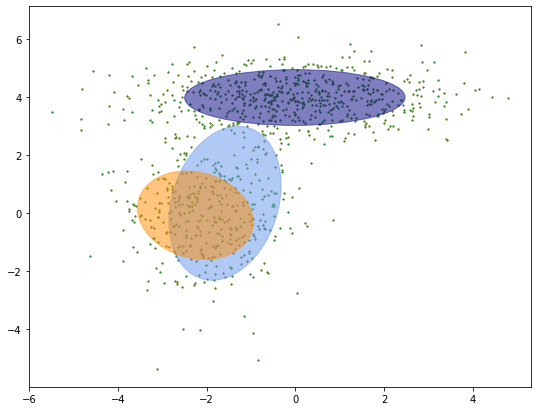

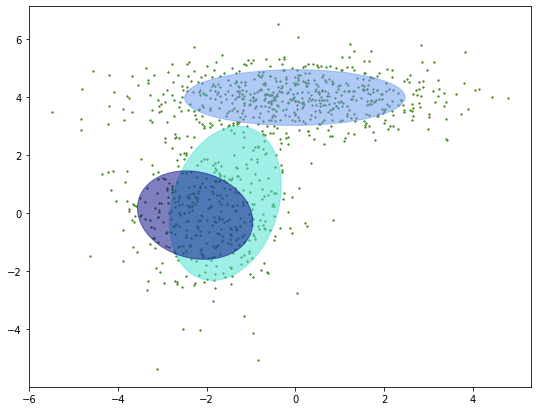

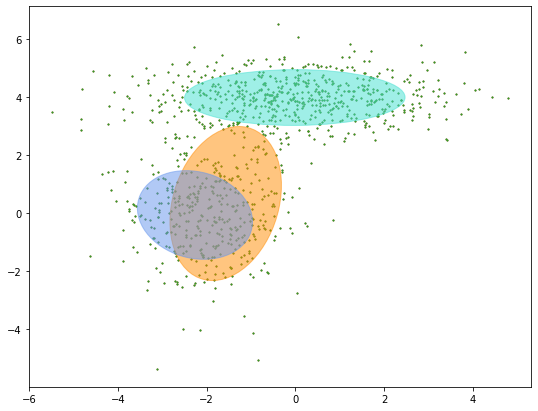

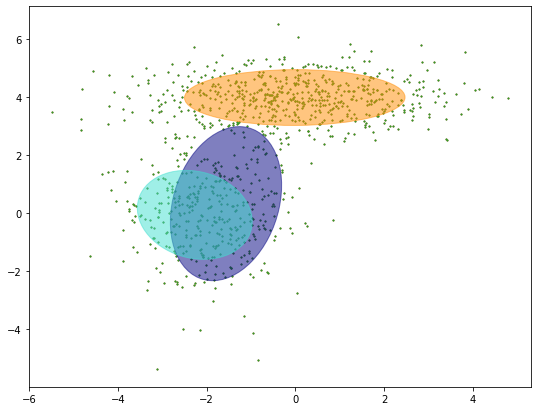

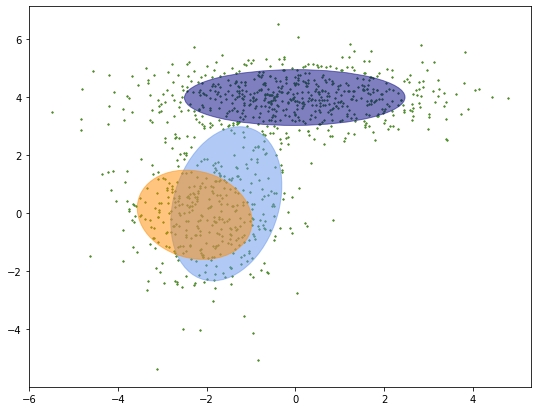

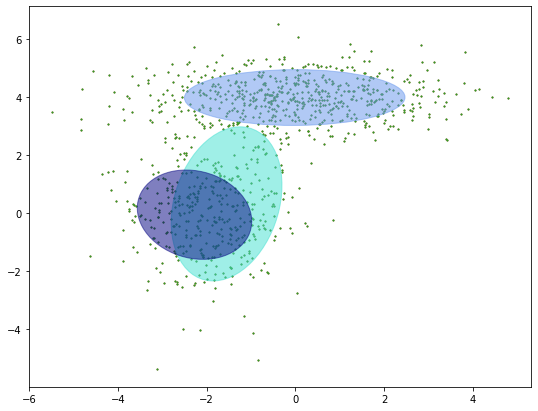

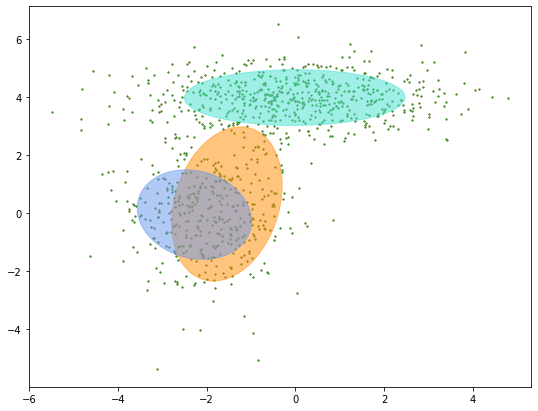

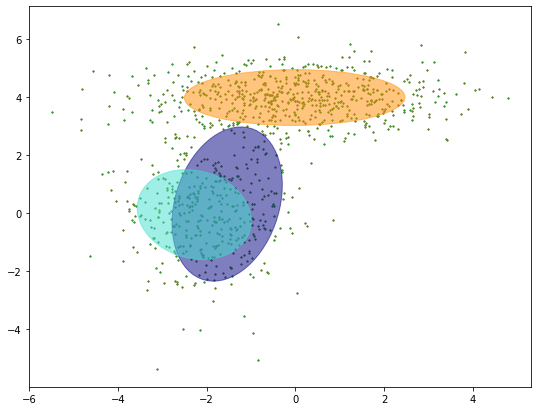

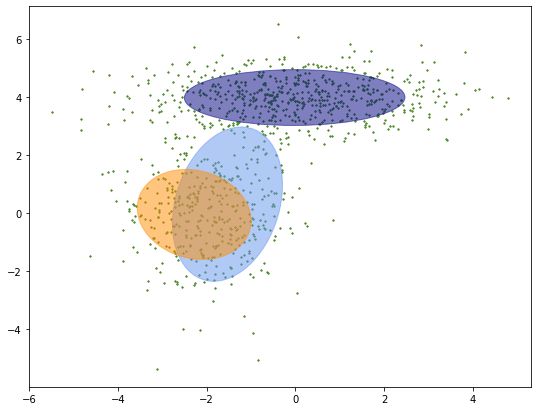

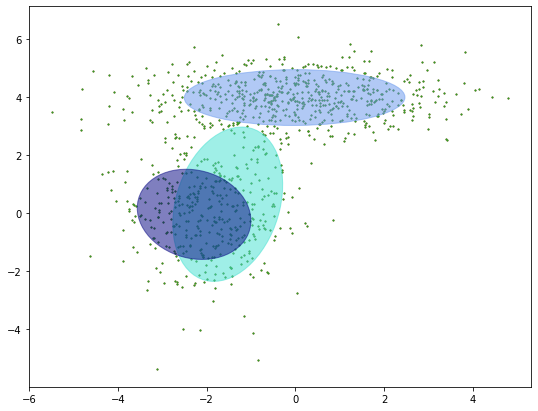

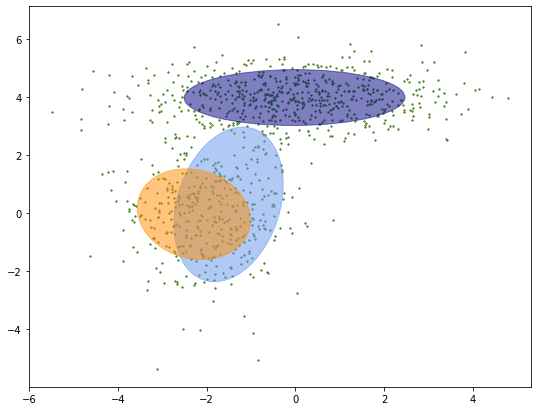

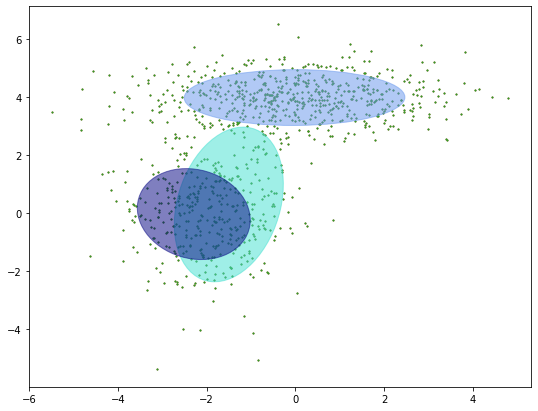

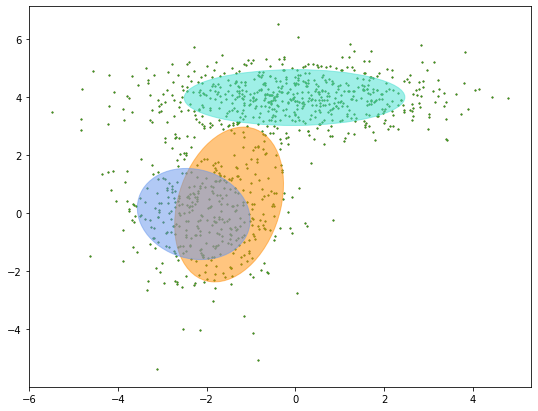

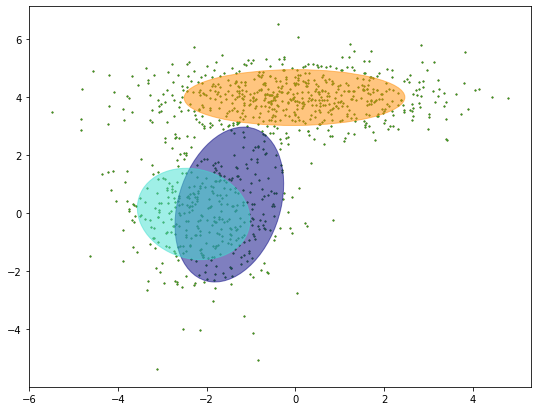

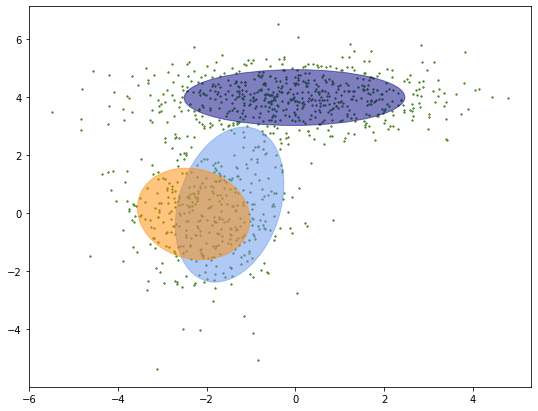

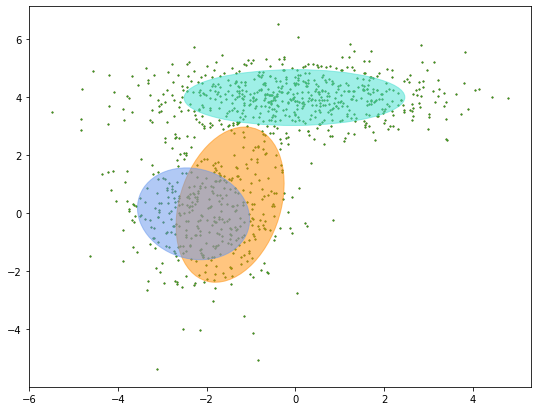

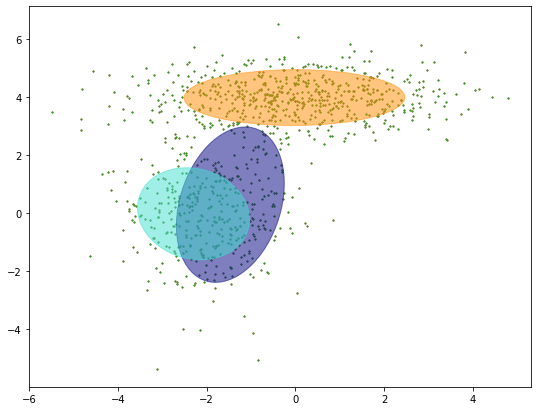

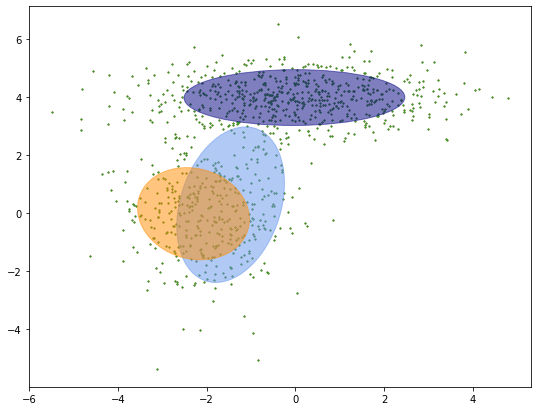

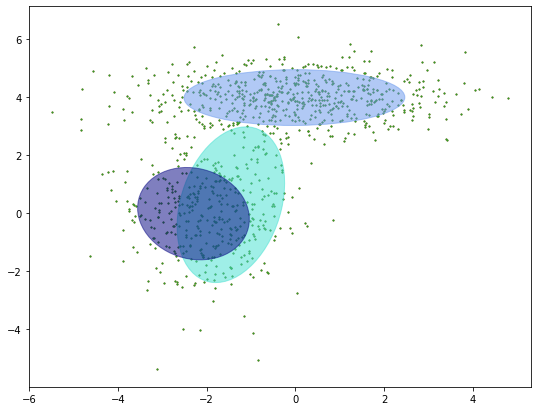

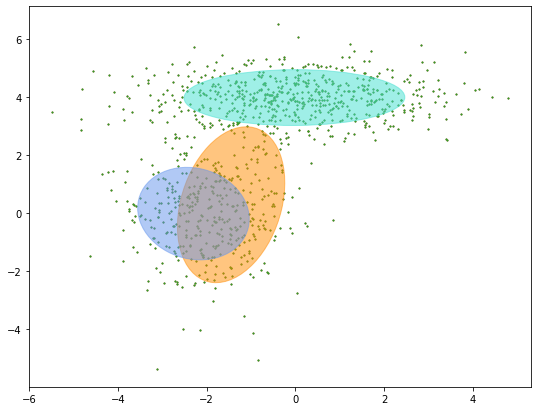

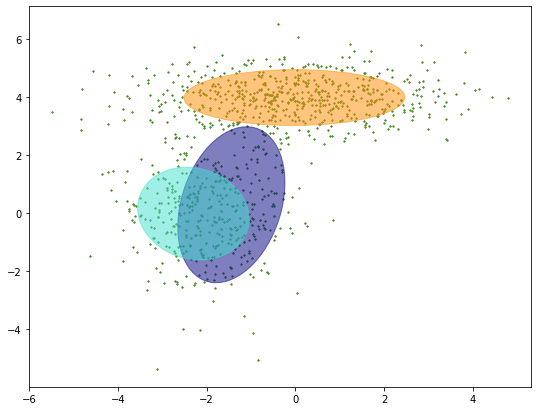

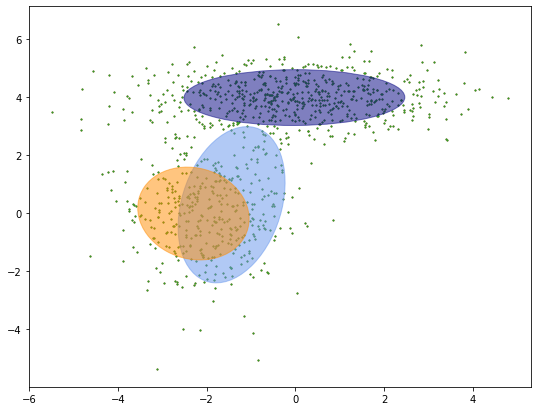

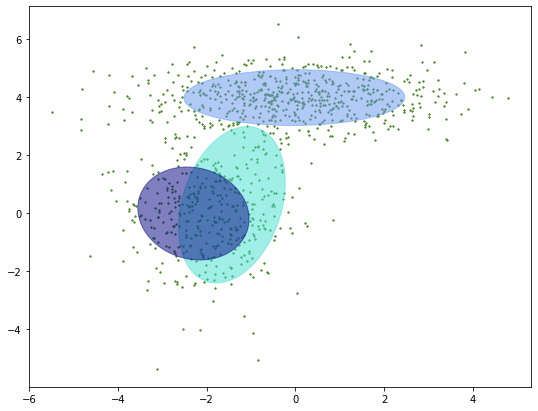

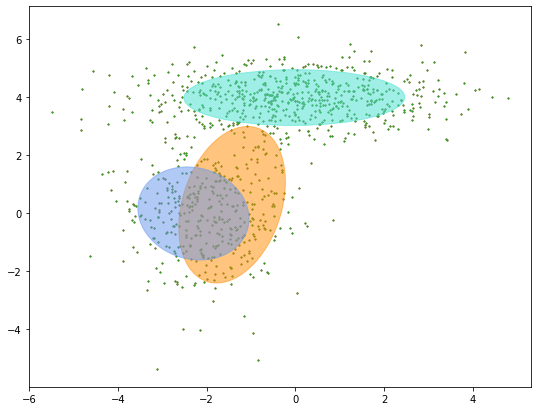

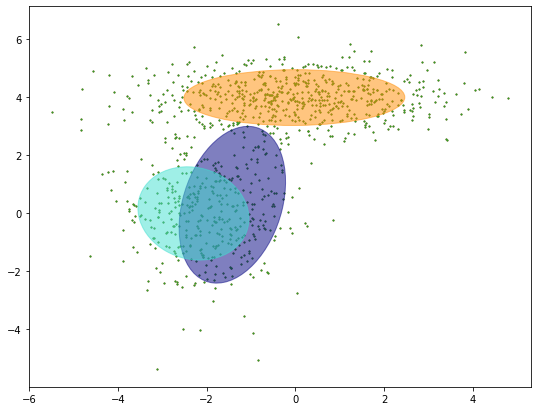

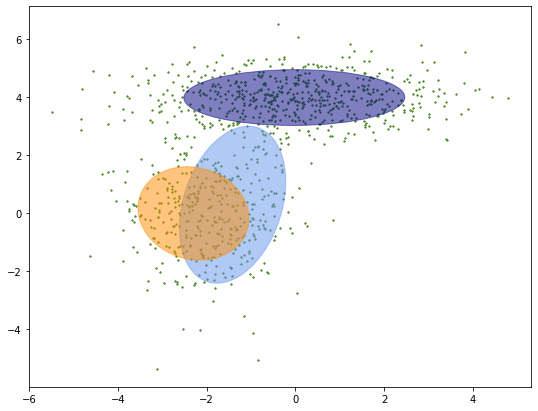

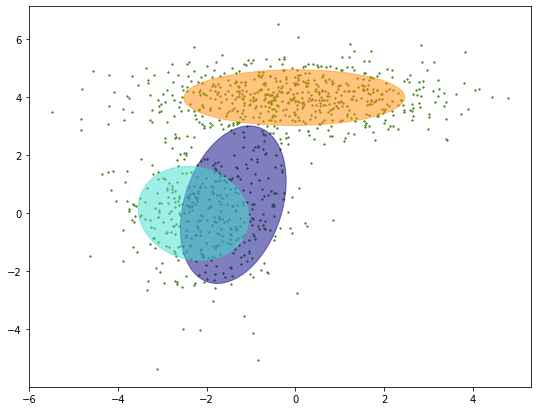

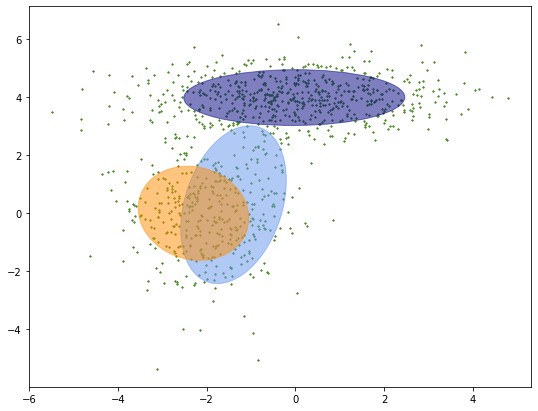

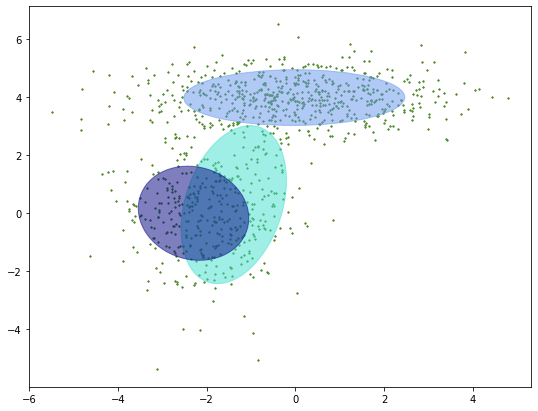

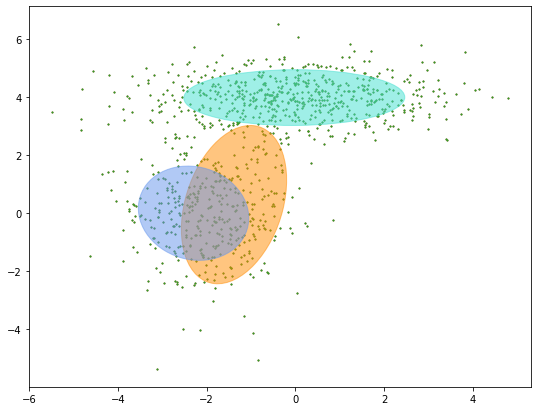

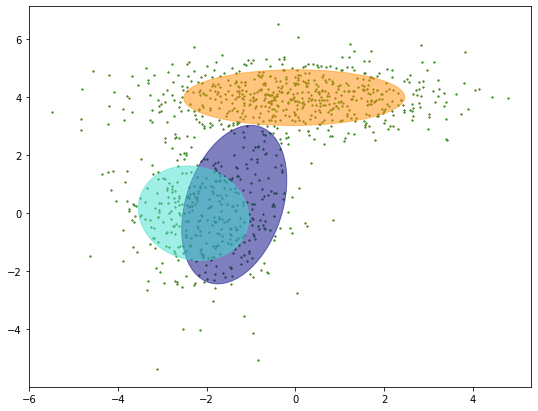

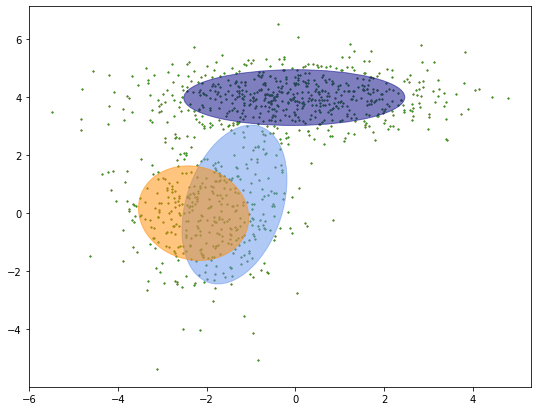

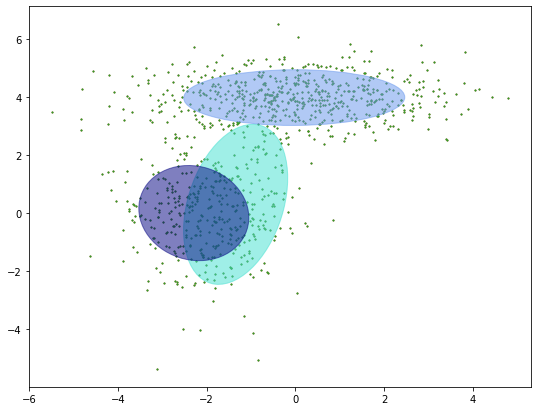

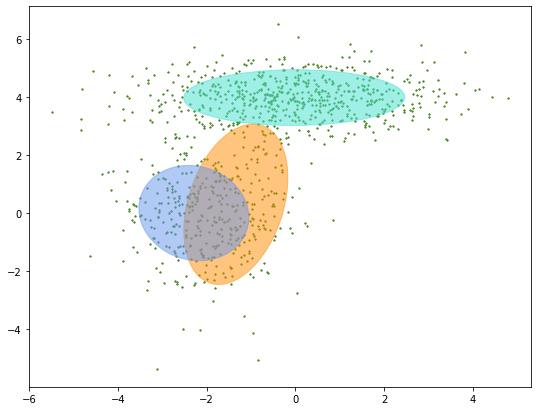

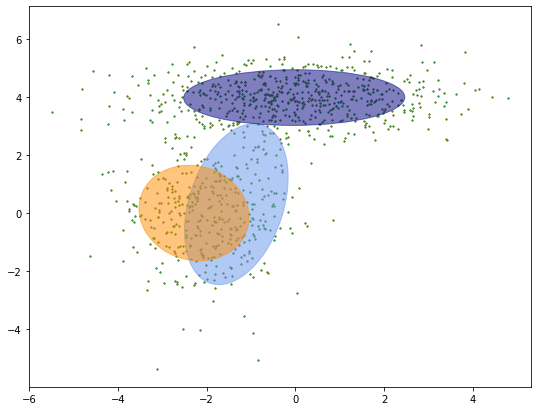

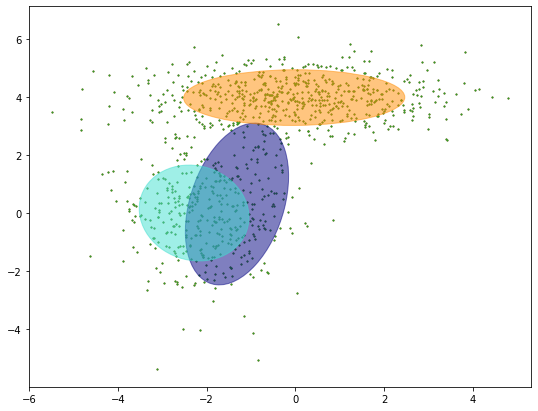

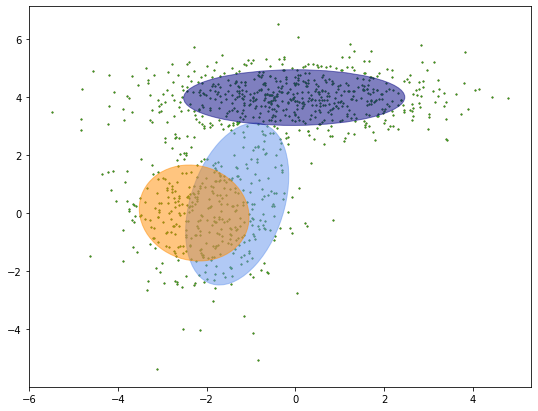

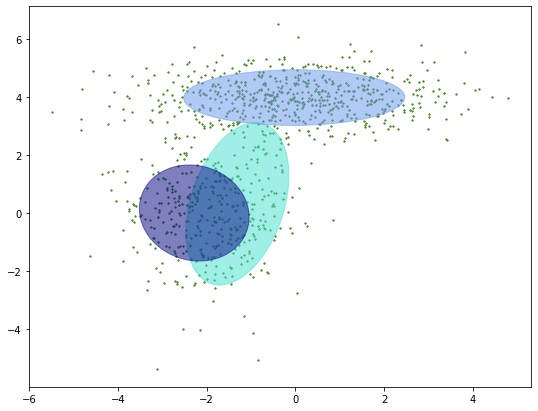

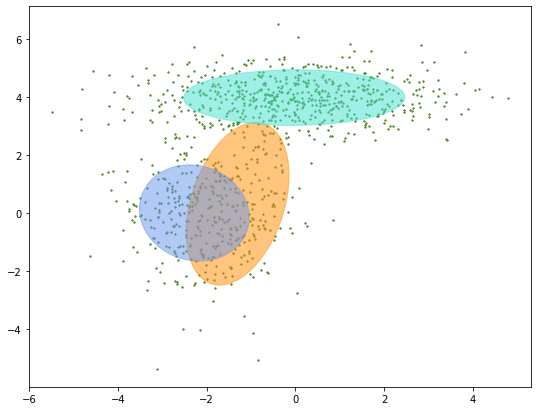

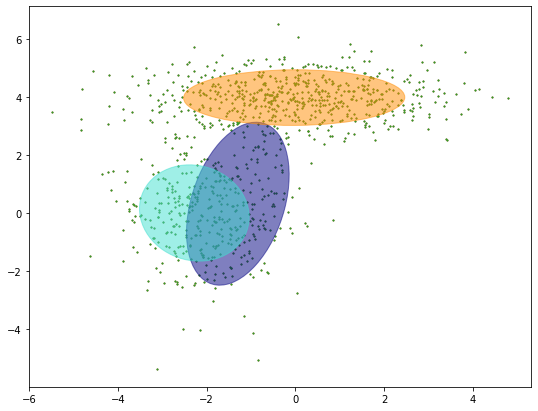

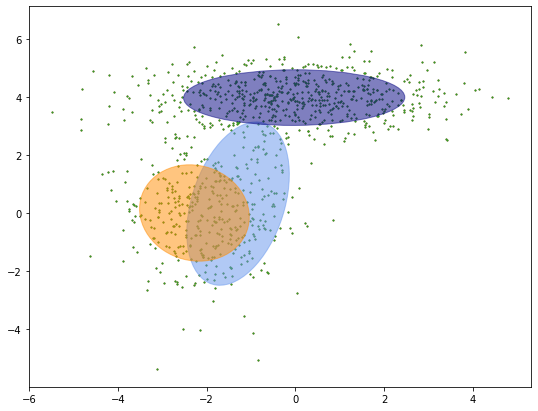

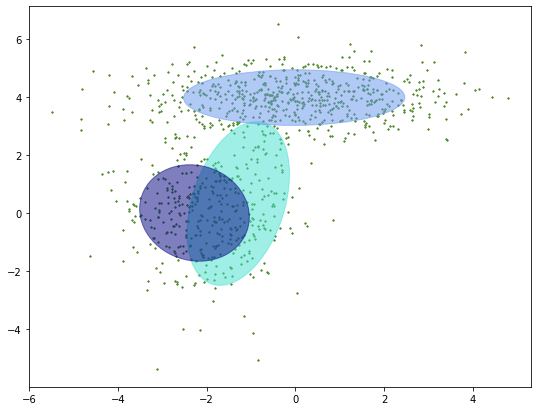

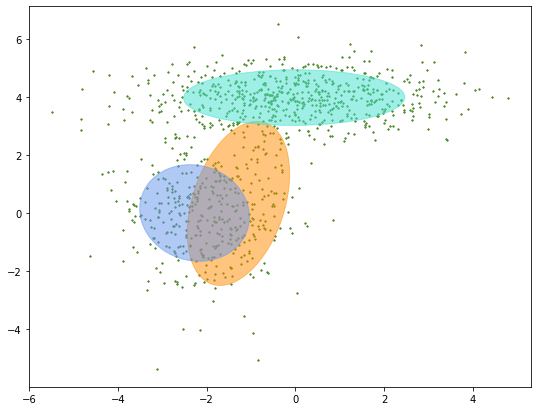

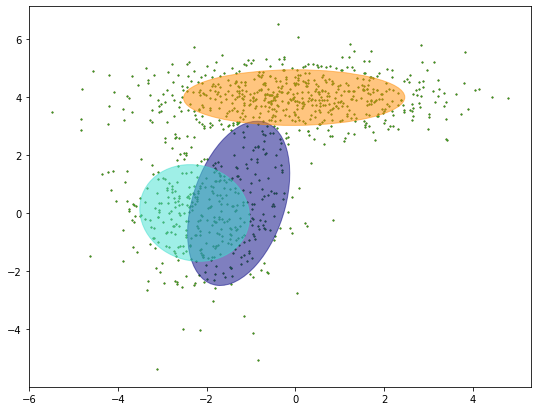

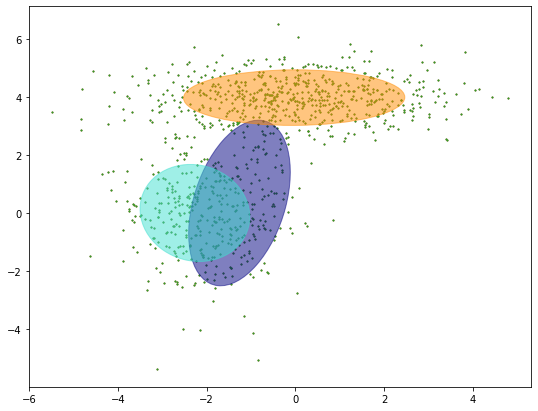

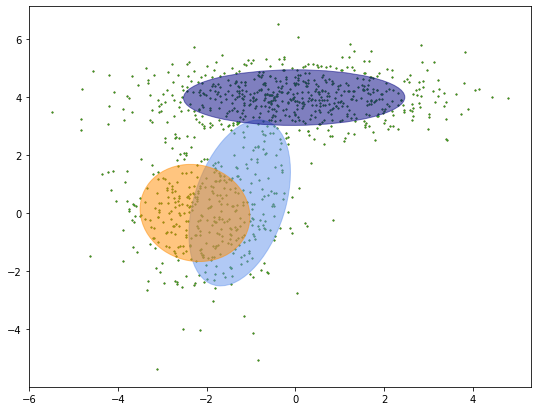

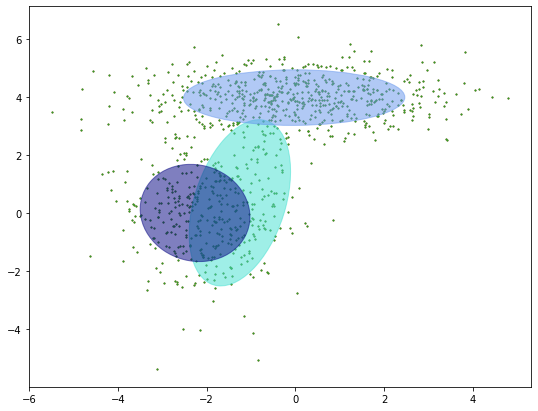

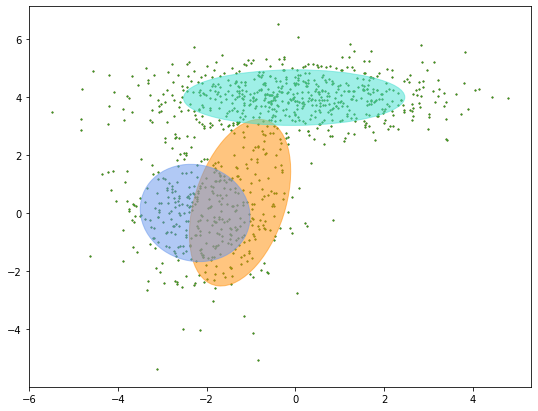

In [8]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)
